# Import required libraries

In [1]:
import pandas as pd                      # For data manipulation and analysis
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For data visualization

# Load the housing dataset

In [2]:
# Reads CSV file into a pandas DataFrame
dataset = pd.read_csv('housing.csv') 
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
dataset.info() # Displays info about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
dataset.describe()  # Provides statistical summary of numeric columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

# Suppose the column with strings is 'Address' or 'City'
lb = LabelEncoder()
dataset['ocean_proximity'] = lb.fit_transform(dataset['ocean_proximity'])  # Convert strings to numbers

In [6]:
# Check correlation of 'total_bedrooms' with other numerical features
dataset.corr()['total_bedrooms'] 

longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
ocean_proximity      -0.014768
Name: total_bedrooms, dtype: float64

In [7]:
# Count missing values in 'total_bedrooms' column
dataset['total_bedrooms'].isnull().sum()

np.int64(207)

In [8]:
# Fill missing values in 'total_bedrooms' with its mean value
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean(), inplace=True)

C:\Users\arbaz\AppData\Local\Temp\ipykernel_15460\4119179006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean(), inplace=True)


In [9]:
# Keep 'total_bedrooms' column aside for prediction and remove unnecessary columns
bedrooms = dataset['total_bedrooms']
dataset = dataset.drop(['total_bedrooms','longitude','latitude','housing_median_age','median_income','ocean_proximity','median_house_value'], axis = 1)
dataset['bedrooms'] = bedrooms
dataset

,total_rooms,population,households,bedrooms
0,880.0,322.0,126.0,129.0
1,7099.0,2401.0,1138.0,1106.0
2,1467.0,496.0,177.0,190.0
3,1274.0,558.0,219.0,235.0
4,1627.0,565.0,259.0,280.0
...,...,...,...,...
20635,1665.0,845.0,330.0,374.0
20636,697.0,356.0,114.0,150.0
20637,2254.0,1007.0,433.0,485.0
20638,1860.0,741.0,349.0,409.0


# ---- Data Visualization Section ----


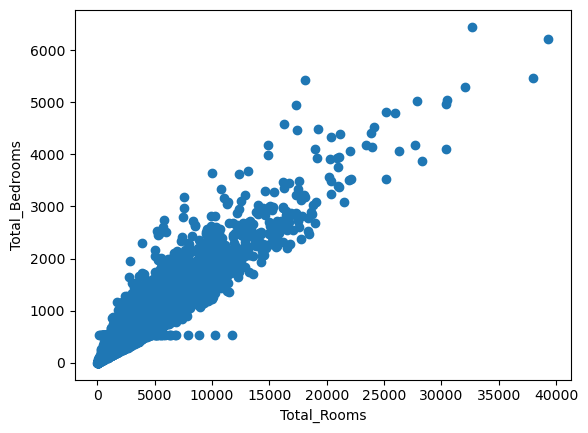

In [10]:
# Relationship between total rooms and total bedrooms
plt.scatter(dataset['total_rooms'],dataset['bedrooms'])
plt.xlabel("Total_Rooms")
plt.ylabel("Total_Bedrooms")
plt.show()

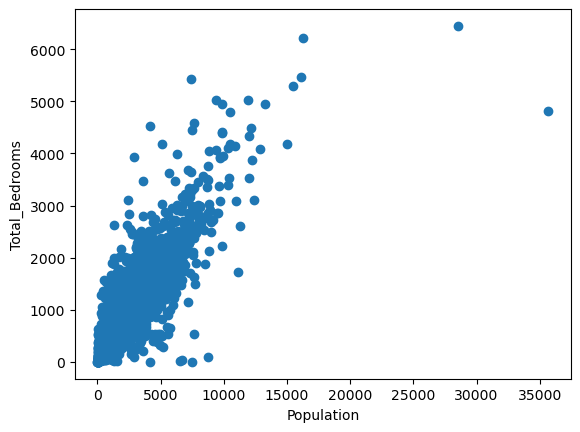

In [11]:
# Relationship between population and total bedrooms
plt.scatter(dataset['population'],dataset['bedrooms'])
plt.xlabel("Population")
plt.ylabel("Total_Bedrooms")
plt.show()

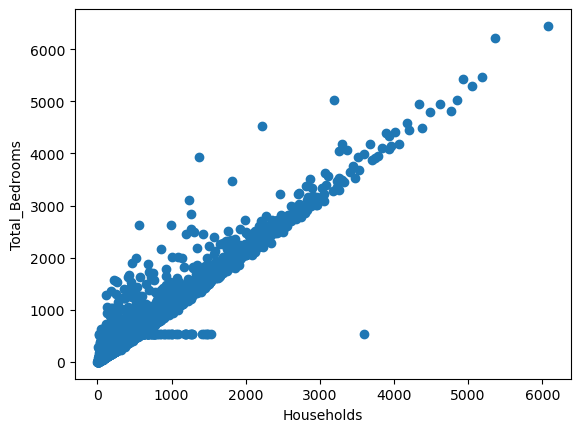

In [12]:
# Relationship between households and total bedrooms
plt.scatter(dataset['households'],dataset['bedrooms'])
plt.xlabel("Households")
plt.ylabel("Total_Bedrooms")
plt.show()

In [13]:
df = dataset.to_numpy()
df.shape

(20640, 4)

# Separate independent (X) and dependent (y) variables

In [14]:
X = df[:, : -1] # All columns except last (features)
y = df[:, -1] # Last column is target variable (total_bedrooms)


# ---- Train Linear Regression Model ----


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()# Create linear regression model object
regressor.fit(X,y)# Train model on all data

LinearRegression()

# Make predictions on training data


In [16]:
y_pred = regressor.predict(X) # Predicted bedroom values
y_pred

array([ 150.30575818, 1291.23593486,  217.00570179, ...,  473.17706734,
        386.63996748,  573.91656811])

# ---- Model Evaluation ----


In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# Calculate common regression error metrics
mse = mean_squared_error(y_pred,y) # Mean Squared Error
mae = mean_absolute_error(y_pred,y) # Mean Absolute Error
RMSE = math.sqrt(mean_squared_error(y_pred,y)) # Root Mean Squared Error
# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", RMSE)


Mean Squared Error: 7387.2382567886825
Mean Absolute Error: 43.54518333199419
Root Mean Squared Error: 85.94904453679914


# ---- Combine Actual and Predicted Results ----


In [18]:
# Create a DataFrame for comparing model predictions
predictions_df = pd.DataFrame({'Population' : dataset['population'],
                              'Households' : dataset['households'],
                              'Total_Rooms' : dataset['total_rooms'],
                               'Total_Bedrooms' : dataset['bedrooms'],
                              'Multiple_Regression' : y_pred})
predictions_df

,Population,Households,Total_Rooms,Total_Bedrooms,Multiple_Regression
0,322.0,126.0,880.0,129.0,150.305758
1,2401.0,1138.0,7099.0,1106.0,1291.235935
2,496.0,177.0,1467.0,190.0,217.005702
3,558.0,219.0,1274.0,235.0,246.253759
4,565.0,259.0,1627.0,280.0,298.290309
...,...,...,...,...,...
20635,845.0,330.0,1665.0,374.0,357.279069
20636,356.0,114.0,697.0,150.0,130.288505
20637,1007.0,433.0,2254.0,485.0,473.177067
20638,741.0,349.0,1860.0,409.0,386.639967


In [19]:
# Assuming total_bedrooms[i] = alpha + (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total_rooms[i]) + error
# Generally: y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

def get_predictions(model, X):
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(new_X, model)

In [20]:
# Create a DataFrame for comparing model predictions
test_model = np.array([1, 1/4, 1/3, 1.2])
get_predictions(test_model, X).shape

(20640,)

In [21]:
mean_absolute_error(predictions_df['Multiple_Regression'], y)

43.54518333199419

# ---- Function to Compute Best Model Parameters ----

In [22]:
from numpy.linalg import inv

def get_best_model(X, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)

In [23]:
# Compute the best model using Normal Equation
best_model = get_best_model(X, y)
# Add model predictions to the DataFrame
predictions_df['Best Predictions'] = get_predictions(best_model, X)
predictions_df

,Population,Households,Total_Rooms,Total_Bedrooms,Multiple_Regression,Best Predictions
0,322.0,126.0,880.0,129.0,150.305758,150.305758
1,2401.0,1138.0,7099.0,1106.0,1291.235935,1291.235935
2,496.0,177.0,1467.0,190.0,217.005702,217.005702
3,558.0,219.0,1274.0,235.0,246.253759,246.253759
4,565.0,259.0,1627.0,280.0,298.290309,298.290309
...,...,...,...,...,...,...
20635,845.0,330.0,1665.0,374.0,357.279069,357.279069
20636,356.0,114.0,697.0,150.0,130.288505,130.288505
20637,1007.0,433.0,2254.0,485.0,473.177067,473.177067
20638,741.0,349.0,1860.0,409.0,386.639967,386.639967


In [24]:

# Evaluate best model performance
mean_absolute_error(predictions_df['Best Predictions'], y), mean_squared_error(predictions_df['Best Predictions'], y)

(43.545183331993734, 7387.238256788684)